 <span style='font-family:serif'> <font size="10"> <span style='color:#0066cc'>**LLCrearrange**<ins>


 <span style='font-family:serif'> <font size="5"> In order to test the new additions to oceanspy, do the following:
    
    
    
1.  <span style='font-family:serif'> <font size="5"> <span style='color:#CC0000'> **Create** <span style='color:#000000'> new container.

2.  <span style='font-family:serif'> <font size="5"> <span style='color:#CC0000'> **Open** <span style='color:#000000'> terminal and activate the Oceanography environment. i.e. 
```
conda activate Oceanography
```

3.  <span style='font-family:serif'> <font size="5"> <span style='color:#CC0000'> **Unistall** <span style='color:#000000'> the current version of oceanspy:
    
```
python -m pip uninstall oceanspy
```
    
4.   <span style='font-family:serif'> <font size="5"> <span style='color:#CC0000'> **Install** <span style='color:#000000'> oceanspy from Github (which contains the newly added code)
```
pip install git+https://github.com/hainegroup/oceanspy.git
```


    
5.  <span style='font-family:serif'> <font size="5"> <span style='color:#CC0000'> **Open** <span style='color:#000000'> a new notebook using the Oceanography environment, or restart any currently running notebooks.

In [1]:
import oceanspy as ospy
import xarray as xr
import numpy as np
import dask
import copy as _copy
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20, 12

In [15]:
from oceanspy.llc_rearrange import LLCtransformation


In [16]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37919,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:37204,Total threads: 1
Dashboard: http://127.0.0.1:36312/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:46741,


<span style='font-family:serif'> <span style='color:#0066cc'> <font size="20"> **Datasets**

<span style='font-family:serif'>  <font size="6"> Select one of the two following datasets only. 
    

<span style='font-family:serif'> <span style='color:#CC0000'> <font size="6">  ECCO

In [42]:
# If want to look at ECCO:
ECCO_od = ospy.open_oceandataset.from_catalog('ECCO')
ECCO_od._ds = ECCO_od._ds.drop_vars({'k', 'k_u', 'k_p1', 'k_l'})
ECCO_co_list = [var for var in ECCO_od._ds.variables if "time" not in ECCO_od._ds[var].dims]
ECCO_od._ds = ECCO_od._ds.set_coords(co_list)

ECCO_od = _copy.copy(ECCO_od)

co_list = [var for var in ECCO_od._ds.coords if var not in ECCO_od._ds.dims]
ECCO_od_ds = _copy.deepcopy(ECCO_od._ds.reset_coords()).isel(time=slice(1)) 


Opening ECCO.
ECCO v4r4 3D dataset, ocean simulations on LLC90 grid


<span style='font-family:serif'> <span style='color:#CC0000'> <font size="6">  LLC4320

In [44]:
LLC4320_od = ospy.open_oceandataset.from_catalog('LLC4320')
LLC4320_od._ds = LLC4320_od._ds.drop_vars({'k', 'k_u', 'k_p1', 'k_l', 'niter'})
co_list = [var for var in LLC4320_od._ds.variables if "time" not in LLC4320_od._ds[var].dims]
LLC4320_od._ds = LLC4320_od._ds.set_coords(co_list)

Opening LLC4320.
10 day hourly data from the LLC4320 simulations computed using the MITGCM, a general, curvilinear ocean simulation on the cube-sphere.


In [45]:
LLC4320_ds = _copy.deepcopy(LLC4320_od._ds.reset_coords()).isel(time=slice(1)) 


<span style='font-family:serif'> <span style='color:#006633'> <font size="10"> **A single snapshot for now**

<span style='font-family:serif'> <span style='color:#4C0099'> <font size="6"> **LLCrearrange** <span style='color:#000000'> takes the `dataset` as argument, along with range of Longitudes and Latitudes.




<span style='font-family:serif'> <font size="5"> **Note** When transforming LLC data code runs much slower. Not much I can do about this with the current computational resources of Sciserver.

<span style='font-family:serif'> <span style='color:#0066cc'> <font size="20"> **World Ocean Atlas**


In [14]:
# ================= A01 # ==========================

A01_lon = [-54.49  , -54.285 , -54.1317, -53.945 , -53.8267, -53.6083, -53.3767,
           -49.175 , -49.995 , -49.4533, -48.8967, -48.6883, -48.57  , -48.5317,
           -48.4217, -48.225 , -42.505 , -42.1667, -41.86  , -41.4967, -41.2233,
           -40.8917, -40.0617, -38.9133, -37.64  , -37.6433, -36.3667, -35.0817,
           -33.7883, -33.0333, -32.3017, -31.5633, -30.8067, -30.2733, -29.7267,
           -29.1883, -28.6667, -28.125 , -28.1333, -27.8033, -27.4933, -27.15  ,
           -26.8017, -26.4683, -26.13  , -25.875 , -25.6333, -25.4133, -24.6867,
           -23.5333, -22.39  , -21.2433, -20.01  , -18.8817, -17.8283, -16.99  ,
           -16.1833, -15.7633, -15.4933, -15.215 , -14.925 , -14.6417, -14.2583]

A01_lat = [54.7533, 54.955 , 55.1083, 55.24  , 55.4133, 55.615 , 55.8433, 59.7467,
           59.0433, 59.4833, 59.9917, 60.1833, 60.3   , 60.3517, 60.4067, 60.5633,
           59.9933, 59.9567, 59.92  , 59.875 , 59.8667, 59.8483, 59.7417, 59.6467,
           59.52  , 59.5233, 59.3917, 59.2567, 59.1317, 59.0333, 58.9717, 58.88  ,
           58.795 , 58.5083, 58.24  , 57.9617, 57.6783, 57.3817, 57.3733, 56.915 ,
           56.4533, 55.9833, 55.53  , 55.0717, 54.5983, 54.2933, 53.9683, 53.67  ,
           53.4483, 53.1767, 52.87  , 52.56  , 52.33  , 52.345 , 52.3233, 52.3333,
           52.3283, 52.3317, 52.3333, 52.33  , 52.3333, 52.3333, 52.3333]


# ================= A03 # =================

A03_lon = [ -8.5263,  -8.7913,  -9.2707, -11.056 , -12.2588, -13.4383,
            -15.2052, -16.409 , -17.5902, -18.7667, -20.5403, -21.7258,
            -23.5075, -24.709 , -25.8893, -27.0733, -28.2547, -30.0337,
            -31.2247, -32.406 , -33.5903, -34.7717, -35.955 , -37.1423,
            -38.9333, -40.1187, -41.8923, -43.0833, -44.2413, -46.0227,
            -48.3923, -49.59  , -50.7863, -52.0168, -53.2757, -54.5547,
            -55.8257, -57.0927, -58.355 , -59.5913, -60.8432, -62.792 ,
            -64.0677, -65.3348, -66.6078, -68.5217, -69.3757, -69.802 ,
            -70.205 , -70.8197, -71.2227, -71.5228, -71.9333, -72.2883,
            -72.6343, -72.9763, -73.3187]

A03_lat = [36.8758, 36.4247, 36.2353, 36.255 , 36.2562, 36.253 , 36.2532,
           36.2667, 36.239 , 36.2363, 36.2667, 36.2532, 36.2542, 36.2257,
           36.252 , 36.2412, 36.2502, 36.2417, 36.2373, 36.25  , 36.243 ,
           36.2383, 36.2377, 36.256 , 36.2402, 36.2423, 36.2403, 36.2342,
           36.25  , 36.2257, 36.2363, 36.234 , 36.2333, 36.25  , 36.254 ,
           36.2355, 36.2343, 36.2573, 36.252 , 36.2757, 36.2417, 36.2505,
           36.251 , 36.2342, 36.235 , 36.2363, 36.3227, 36.507 , 36.7197,
           36.9893, 37.1833, 37.3583, 37.4757, 37.6227, 37.7747, 37.9255,
           38.0863]

# ================= A05 # =================

A05_lon= [-15.9717, -17.0942, -18.7502, -21.3338, -23.9965, -26.6713,
           -29.3292, -31.9947, -34.6752, -37.3267, -39.9963, -42.3343,
           -44.6697, -46.9997, -49.3288, -51.6598, -53.9998, -56.6703,
           -59.3328, -61.9872, -64.6655, -67.3227, -70.0017, -72.5737,
           -74.822 , -79.2333, -79.5667, -79.9333]

A05_lat = [24.5   , 24.4987, 24.5023, 24.5003, 24.5007, 24.507 , 24.5032,
           24.5018, 24.514 , 24.5087, 24.507 , 24.5017, 24.501 , 24.4997,
           24.5012, 24.5083, 24.4987, 24.4948, 24.5003, 24.4888, 24.502 ,
           24.5245, 24.5007, 24.7493, 25.0975, 26.0667, 26.0547, 26.0452]

# ================= A10 # =================

A10_lon = [-47.3867, -47.0263, -46.6698, -46.3083, -45.9388, -45.4082,
            -44.2217, -42.9098, -41.7367, -40.5867, -39.5303, -38.9165,
            -38.0033, -37.1695, -36.4998, -35.8357, -35.1665, -34.5015,
            -33.509 , -32.4993, -31.504 , -30.5015, -29.5093, -28.4203,
            -26.719 , -25.0178, -23.3153, -21.6217, -19.9187, -18.3845,
            -17.0133, -15.6625, -14.3347, -12.9893, -11.6763, -10.3297,
             -8.9983,  -7.3322,  -5.6678,  -4.0005,  -2.3233,  -0.7297,
              0.5665,   1.7007,   2.8298,   3.7778,   5.0995,   6.78  ,
              8.4653,  10.1477,  11.8303,  12.4668,  13.1142,  13.7347,
             14.3665,  14.999 ]

A10_lat = [-27.6833, -27.816 , -27.9052, -27.9917, -28.0885, -28.2238,
            -28.615 , -29.0362, -29.4217, -29.8073, -30.0027, -30.0038,
            -30.0027, -30.0017, -30.006 , -30.0042, -29.9963, -29.9975,
            -29.992 , -29.9965, -30.0002, -29.9995, -29.9983, -29.9977,
            -29.998 , -29.9963, -29.9998, -29.9983, -29.9988, -30.008 ,
            -29.9987, -30.    , -30.0058, -30.0128, -30.0023, -30.0007,
            -30.    , -30.0017, -29.9988, -29.9975, -29.995 , -30.0163,
            -29.8583, -29.6038, -29.3373, -29.6085, -29.7517, -29.754 ,
            -29.7457, -29.7478, -29.7517, -29.4972, -29.2425, -29.0012,
            -28.7517, -28.5028]

# ================= A12 # =================

A12_lon = [1.79667e+01,  1.75500e+01,  1.69333e+01,  1.58000e+01,  1.46667e+01,
            1.35500e+01,  1.19833e+01,  1.07833e+01,  9.40000e+00,  7.73330e+00,
            6.05000e+00,  4.36670e+00,  2.66670e+00,  1.83330e+00,  1.23330e+00,
            9.16700e-01,  2.83300e-01,  3.33000e-02,  0.00000e+00,  1.67000e-02,
            0.00000e+00,  0.00000e+00,  0.00000e+00,  1.67000e-02,  0.00000e+00,
            0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
            0.00000e+00,  1.67000e-02,  1.67000e-02,  1.67000e-02, -3.66700e-01,
           -9.15000e+00, -9.91670e+00, -2.50000e+01, -3.35167e+01, -3.64500e+01,
           -4.02167e+01, -4.19500e+01, -4.35833e+01, -4.35500e+01, -4.42833e+01,
           -4.29833e+01, -4.71833e+01, -4.79500e+01, -4.93167e+01, -5.02667e+01]

A12_lat = [-34.1833, -34.55  , -34.1167, -36.1   , -37.05  , -38.05  , -39.35  ,
            -40.3167, -41.05  , -41.5167, -42.    , -42.45  , -42.9333, -44.25  ,
            -45.5   , -46.1333, -47.4   , -49.9833, -50.9833, -54.    , -56.    ,
            -58.    , -59.    , -60.    , -61.    , -62.    , -62.9833, -64.    ,
            -65.    , -66.    , -67.    , -68.    , -68.5   , -69.    , -69.5   ,
            -70.5167, -70.4833, -69.2167, -65.9667, -65.55  , -65.1333, -64.6833,
            -63.4167, -62.6667, -62.    , -60.9667, -60.2167, -60.1667, -60.1667,
            -60.2167]

# ================= A16 # =================

A16_lon = [-30.8953, -30.9118, -33.6328, -34.7378, -36.1152, -35.233 ,
            -34.0001, -32.7767, -31.513 , -30.2636, -29.0328, -27.8001,
            -26.4387, -25.3001, -25.0005, -25.0001, -24.9975, -25.0002,
            -25.0001, -25.0002, -25.0001, -24.9979, -25.0001, -25.0015,
            -25.0002, -24.9999, -25.0001, -24.9992, -24.9998, -25.    ,
            -25.0002, -25.0002, -25.0022, -25.0003, -25.    , -25.7479,
            -26.7509, -27.4999, -28.7487, -29.0002, -28.9944, -29.0001,
            -28.7185, -27.3157, -26.1834, -25.3517, -24.2167, -23.0993,
            -21.9664, -20.8503, -19.9994, -19.9994, -20.0015, -20.0013,
            -19.9967, -20.0005, -19.9996, -19.9919, -20.0009, -20.0005,
            -19.9997, -19.9983, -20.0003, -19.9991, -20.0014]

A16_lat = [-60.013 , -58.0281, -55.9992, -55.2302, -53.4317, -52.    ,
            -50.0008, -48.0071, -45.9991, -44.0015, -41.9999, -39.9986,
            -38.    , -36.    , -34.0002, -32.0005, -30.0002, -28.0001,
            -26.0001, -23.9999, -21.9998, -19.9995, -18.0003, -16.0005,
            -14.0001, -11.9984, -10.0004,  -7.9989,  -6.0016,  -4.4989,
             -2.6669,  -1.3326,  -0.3323,   1.3336,   2.6675,   4.5017,
              6.5006,   8.    ,  10.5009,  13.0023,  15.6684,  18.9999,
             20.5043,  23.0006,  25.0004,  26.5015,  28.4996,  30.5005,
             32.5018,  34.5008,  35.9998,  38.4999,  40.5002,  43.9989,
             44.4983,  46.0023,  48.4993,  50.498 ,  52.4999,  54.4991,
             56.4998,  58.4995,  60.4994,  61.8329,  63.2173]


# ================= A24 # =================

A24_lon = [-27.035 , -25.766 , -24.318 , -22.8665, -21.3673, -19.8657, -18.3167,
            -16.7487, -15.1642, -13.5245, -12.4062, -11.2297, -14.3157, -14.7447,
            -16.1748, -16.87  ,  -9.3343,  -9.9807, -11.8422, -12.7628, -13.6292,
            -16.0682, -18.9   , -21.1902, -23.953 , -26.3023, -27.9245, -29.6483,
            -32.2612, -34.946 , -36.2038, -36.7672, -38.9553, -42.714 , -41.9523,
            -40.7612, -39.169 , -37.6393, -35.9328, -34.7423, -34.2147, -33.35  ,
            -32.5005, -31.6378, -30.777 , -30.013 , -29.2635, -28.6958, -28.231 ,
            -27.7658, -27.3005, -27.0322]

A24_lat = [38.8193, 39.7163, 40.7328, 41.7383, 42.7665, 43.7868, 44.7995, 45.8168,
           46.8375, 47.8335, 48.5373, 49.1817, 53.6897, 53.9355, 54.584 , 54.8878,
           57.7497, 57.7478, 57.7503, 57.7697, 57.8957, 58.35  , 58.9113, 59.3512,
           59.8672, 60.5817, 61.1753, 61.7505, 62.6343, 63.5038, 63.9125, 64.0837,
           64.7667, 59.5618, 58.847 , 57.741 , 56.5162, 55.2828, 53.8827, 52.7967,
           51.9222, 50.5167, 49.1048, 47.626 , 46.085 , 44.6842, 43.2815, 42.2018,
           41.2505, 40.3173, 39.3832, 38.817 ]

# define range of Latitude ans longitude from above

In [27]:
_XRange = A01_lon
_YRange = A01_lat 

In [46]:
%%time
DS = LLCtransformation.arctic_crown(LLC4320_ds, XRange = _XRange, YRange = _YRange)

/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/home/idies/miniconda3/envs/Oceanography/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


faces in the cutout [2, 10]
CPU times: user 55 s, sys: 28.8 s, total: 1min 23s
Wall time: 2min 33s


# define slicing parameters for plots

The argument for each dimension define the number of points used in the plot. For example

```python
X:slice(0, -1, 10) 
```
is equivalent to 
```python
[:-1:10]
```
along the x-dimension. 

# Modify accordingly!!

For ECCO you want to plot all the points, but for LLC4320 you **may not** if you want to 

In [47]:
h_arg_c = {'X': slice(0, -1), 'Y': slice(0, -1)}   # horizontal variables, at center points

arg_c = {'X': slice(0, -1), 'Y': slice(0, -1), 'Z':0, 'time':0}  #  4d variables at center points

arg_u = {'Xp1': slice(0, -1), 'Y': slice(0, -1), 'Z':0, 'time':0}  # U-velocity

arg_v = {'X': slice(0, -1), 'Yp1': slice(0, -1), 'Z':0, 'time':0}  # V-velocity



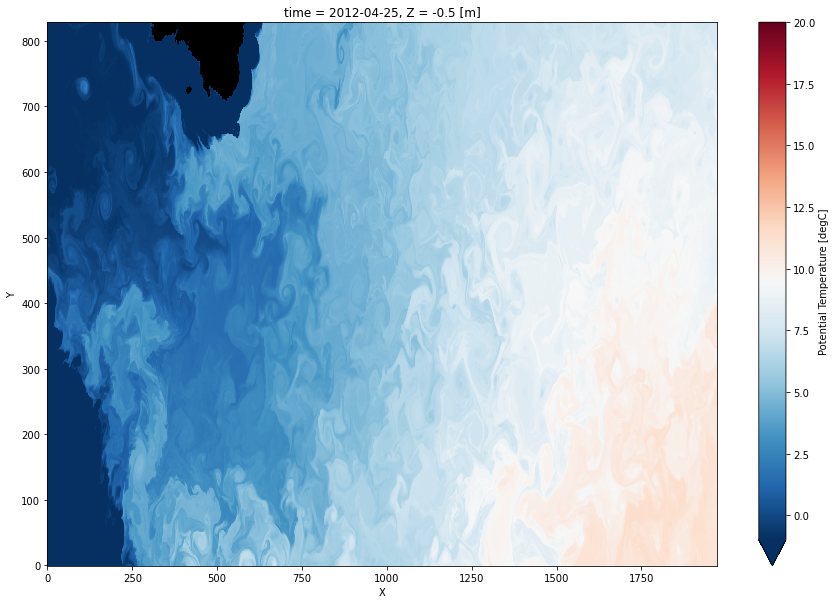

In [49]:
fig= plt.figure(figsize=(15, 10), facecolor='w')

DS['Depth'].isel(**h_arg_c).plot(cmap='Greys_r', vmin=0, vmax=1000, add_colorbar=False)
DS['Temp'].isel(**arg_c).where(DS['Depth'].isel(**h_arg_c)>0).plot(vmin=-1, vmax=20, cmap='RdBu_r',)
plt.show()

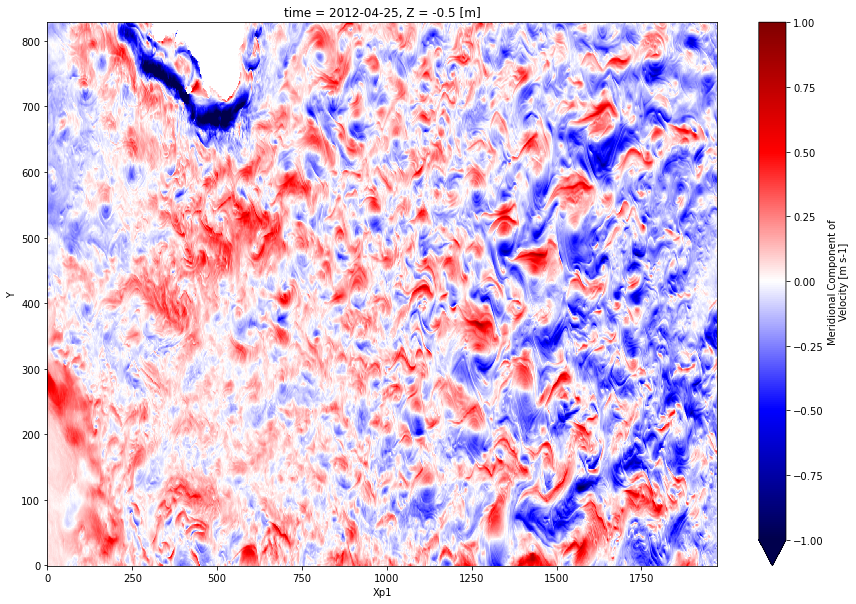

In [50]:
fig= plt.figure(figsize=(15, 10), facecolor='w')
DS['U'].isel(**arg_u).plot(cmap='seismic', vmin=-1, vmax=1)
plt.show()

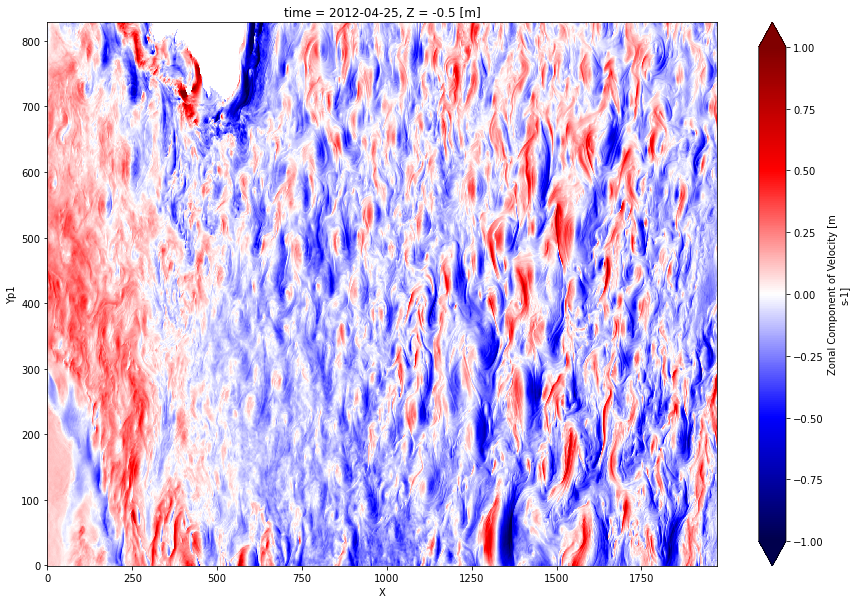

In [51]:
fig= plt.figure(figsize=(15, 10), facecolor='w')
DS['V'].isel(**arg_v).plot(cmap='seismic', vmin=-1, vmax=1)
plt.show()